In [17]:
import warnings
import os
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

import tensorflow as tf
from tensorflow.keras import utils, datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import pickle
import csv
import itertools
from collections import defaultdict
import time
import pandas as pd
import math
from tqdm import tqdm
import dill

In [2]:
# import urllib.request
# if not os.path.exists("lab11_1_lib.py"):
#     urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/11-1_CNN/lab11_1_lib.py", "lab11_1_lib.py")

# from lab11_1_lib import draw_timeline

In [3]:
# Download and prepare the MNIST dataset
(train_image, train_label), (test_image, test_label) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_image, test_image = train_image / 255.0, test_image / 255.0
print('shape of train_image:', train_image.shape)
print('shape of train_label:', train_label.shape)

shape of train_image: (60000, 28, 28)
shape of train_label: (60000,)


In [4]:
# # flating the training data for dense layers
# train_image_1 = train_image.reshape((60000, -1))
# test_image_1 = test_image.reshape((10000, -1))
# print(train_image_1.shape)
# print(test_image_1.shape)

In [5]:
# model_1 = models.Sequential()
# model_1.add(layers.Dense(10, activation='softmax',input_shape=(784,)))
# model_1.summary()

In [6]:
# # compile the model and train it for 5 epochs
# model_1.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model_1.fit(train_image_1, train_label, epochs=5)

In [7]:
# _, test_acc_1 = model_1.evaluate(test_image_1, test_label, verbose=0)
# print('Testing Accuracy : %.4f'%test_acc_1)

In [8]:
# reshaping the training data to 3 dimensions
train_image_2 = train_image.reshape((60000, 28, 28, 1))
test_image_2 = test_image.reshape((10000, 28, 28, 1))
print(train_image_2.shape)
print(test_image_2.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
#The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), strides=(1,1), padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='valid', activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='valid', activation='relu'))

In [10]:
model_2.summary()

# 320 = kernel(3*3) * input_channel(1) * filter(32) + 32  
# 18496 = kernel(3*3) * input_channel(32) * filter(64) + 64 
# 36928 = kernel(3*3) * input_channel(64) * filter(64) + 64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [11]:
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(10, activation='softmax'))

In [12]:
model_2.summary()

# dense 36928 = input_channel(576個特徵from flatten) * filter(64) + 64
# dense_1 650 = input_channel(64個特徵from dense_1) * filter(10) + 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### The kernel appears to have died. It will restart automatically.

Q:跑model_2會導致The kernel appears to have died. It will restart automatically.

A:
In NVIDIA website, they referred to zlibwapi.dll- I was able to locate this file in “C:\Program Files\Microsoft Office\root\Office16\ODBC Drivers\Salesforce\lib” (I installed using Microsoft 365 x64 in windows 11) and copy pasted this file into “C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.6\bin” I was able to run Tensorflow 2.8.0 thereafter

In [13]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(train_image_2, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2564 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9826
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9867
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0401 - accuracy: 0.9885


In [14]:
_, test_acc_2 = model_2.evaluate(test_image_2, test_label, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_2)

Testing Accuracy : 0.9916


In [15]:
# Loading Data

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# convert class vectors to binary vectors
Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


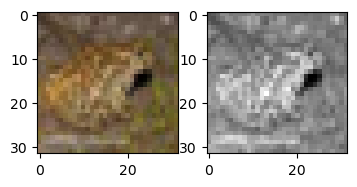

In [18]:
# transform a 3-channel image into one channel
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r = np.asarray(.3, dtype=dtype)
    g = np.asarray(.59, dtype=dtype)
    b = np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

X_train_gray = grayscale(X_train)
X_test_gray = grayscale(X_test)

# plot a randomly chosen image
img = round(np.random.rand() * X_train.shape[0])
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(
    X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [19]:
def getHOGfeat(image,
               stride=8,
               orientations=8,
               pixels_per_cell=(8, 8),
               cells_per_block=(2, 2)):
    cx, cy = pixels_per_cell
    bx, by = cells_per_block
    sx, sy, sz = image.shape
    n_cellsx = int(np.floor(sx // cx))  # number of cells in x
    n_cellsy = int(np.floor(sy // cy))  # number of cells in y
    n_blocksx = (n_cellsx - bx) + 1
    n_blocksy = (n_cellsy - by) + 1
    gx = np.zeros((sx, sy), dtype=np.double)
    gy = np.zeros((sx, sy), dtype=np.double)
    eps = 1e-5
    grad = np.zeros((sx, sy, 2), dtype=np.double)
    for i in range(1, sx - 1):
        for j in range(1, sy - 1):
            gx[i, j] = image[i, j - 1] - image[i, j + 1]
            gy[i, j] = image[i + 1, j] - image[i - 1, j]
            grad[i, j, 0] = np.arctan(gy[i, j] / (gx[i, j] + eps)) * 180 / math.pi
            if gx[i, j] < 0:
                grad[i, j, 0] += 180
            grad[i, j, 0] = (grad[i, j, 0] + 360) % 360
            grad[i, j, 1] = np.sqrt(gy[i, j] ** 2 + gx[i, j] ** 2)
    normalised_blocks = np.zeros((n_blocksy, n_blocksx, by * bx * orientations))
    for y in range(n_blocksy):
        for x in range(n_blocksx):
            block = grad[y * stride:y * stride + 16, x * stride:x * stride + 16]
            hist_block = np.zeros(32, dtype=np.double)
            eps = 1e-5
            for k in range(by):
                for m in range(bx):
                    cell = block[k * 8:(k + 1) * 8, m * 8:(m + 1) * 8]
                    hist_cell = np.zeros(8, dtype=np.double)
                    for i in range(cy):
                        for j in range(cx):
                            n = int(cell[i, j, 0] / 45)
                            hist_cell[n] += cell[i, j, 1]
                    hist_block[(k * bx + m) * orientations:(k * bx + m + 1) * orientations] = hist_cell[:]
            normalised_blocks[y, x, :] = hist_block / np.sqrt(
                hist_block.sum() ** 2 + eps)
    return normalised_blocks.ravel()

In [20]:
X_train_hog = []
X_test_hog = []

print('This will take some minutes.')

for img in tqdm(X_train_gray):
    img_hog = getHOGfeat(img)
    X_train_hog.append(img_hog)

for img in tqdm(X_test_gray):
    img_hog = getHOGfeat(img)
    X_test_hog.append(img_hog)
    
X_train_hog_array = np.asarray(X_train_hog)
X_test_hog_array = np.asarray(X_test_hog)

This will take some minutes.


100%|██████████| 10000/10000 [00:44<00:00, 224.42it/s]


In [21]:
# KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

knn.fit(X_train_hog_array, y_train.ravel())
y_pred = knn.predict(X_test_hog_array)
print('[KNN]')
print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 5334
Accuracy: 0.47


In [22]:
# SVM
from sklearn.svm import SVC 

print('This will take some minutes.')
start_time = time.time()

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_linear = SVC(kernel='linear', random_state=0, gamma=0.2, C=10.0)

svm_linear.fit(X_train_hog_array, y_train.ravel())
y_pred = svm_linear.predict(X_test_hog_array)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test.ravel() != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test.ravel(), y_pred))

print('{:.2f} sec.'.format(time.time()-start_time))

This will take some minutes.
[Linear SVC]
Misclassified samples: 4940
Accuracy: 0.51
363.92 sec.


In [23]:
model_3 = models.Sequential()

#The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
model_3.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model_3.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_3.add(layers.BatchNormalization())
                
model_3.add(layers.Flatten())
model_3.add(layers.Dense(384, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(192, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                      

In [24]:
# conv2d_3: 4864 = kernel(5*5) * in_channel(3) * filter(64) + 64
# conv2d_4: 102464 = kernel(5*5) * in_channel(64) * filter(64) + 64
# flatten_1: 4096 = 8*8*64
# dense_2: 1573248= input_channel(4096) * filter(384) + 384
# dense_3: 73920 = input_channel(384) * filter(192) + 192
# dense_4: 1930 = input_channel(192) * filter(10) + 10

In [25]:
model_3.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)
_, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy : %.4f'%test_acc_3)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.5554 - accuracy: 0.4497 - val_loss: 1.2449 - val_accuracy: 0.5617
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0887 - accuracy: 0.6191 - val_loss: 1.1478 - val_accuracy: 0.5865
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9154 - accuracy: 0.6825 - val_loss: 1.4687 - val_accuracy: 0.5247
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8072 - accuracy: 0.7212 - val_loss: 1.4392 - val_accuracy: 0.5090
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7214 - accuracy: 0.7542 - val_loss: 0.8662 - val_accuracy: 0.7111
Testing Accuracy : 0.7111


In [26]:
# number of samples
n_samples = 200

# an array with shape (n_samples, 5)
raw_data_a = np.random.rand(n_samples, 5)
# a list with length of n_samples from 0 to n_samples-1
raw_data_b = np.arange(n_samples)
print(raw_data_a.shape, raw_data_b.shape)

(200, 5) (200,)


In [27]:
# this tells the dataset that each row of raw_data_a is corresponding to each element of raw_data_b
raw_dataset = tf.data.Dataset.from_tensor_slices((raw_data_a, raw_data_b))

In [28]:
# Here, we print the first 8 batches.
for i,elem in enumerate(raw_dataset):
    print("Batch ", i, ", b are ", elem)
    if i==7:
        break

Batch  0 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.03565776, 0.5803785 , 0.22686049, 0.6952731 , 0.07903353])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.97745919, 0.58393439, 0.87453333, 0.45336625, 0.50803501])>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.42092632, 0.83248116, 0.47857108, 0.46089303, 0.12576498])>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
Batch  3 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.67303103, 0.02673599, 0.35884652, 0.54410375, 0.37527714])>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)
Batch  4 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.41552369, 0.54737788, 0.14701676, 0.24492533, 0.16157296])>, <tf.Tensor: shape=(), dtype=int32, numpy=4>)
Batch  5 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.16429457, 0.82609654, 0.27699024

In [29]:
# Here, we print the first 8 batches.
it = iter(raw_dataset)
for i in range(8):
    print("Batch ", i, ", b are ", next(it))

Batch  0 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.03565776, 0.5803785 , 0.22686049, 0.6952731 , 0.07903353])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.97745919, 0.58393439, 0.87453333, 0.45336625, 0.50803501])>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.42092632, 0.83248116, 0.47857108, 0.46089303, 0.12576498])>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
Batch  3 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.67303103, 0.02673599, 0.35884652, 0.54410375, 0.37527714])>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)
Batch  4 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.41552369, 0.54737788, 0.14701676, 0.24492533, 0.16157296])>, <tf.Tensor: shape=(), dtype=int32, numpy=4>)
Batch  5 , b are  (<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.16429457, 0.82609654, 0.27699024

In [30]:
def preprocess_function(one_row_a, one_b):
    """
        Input: one slice of the dataset
        Output: modified slice
    """
    # Do some data preprocessing, you can also input filenames and load data in here
    # Here, we transform each row of raw_data_a to its sum and mean
    one_row_a = [tf.reduce_sum(one_row_a), tf.reduce_mean(one_row_a)]

    return one_row_a, one_b

raw_dataset = raw_dataset.map(preprocess_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [31]:
it = iter(raw_dataset)
for i in range(8):
    print("Batch ", i, ", b are ", next(it))

Batch  0 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.61720338, 0.32344068])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.39732816, 0.67946563])>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.31863656, 0.46372731])>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
Batch  3 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.97799442, 0.39559888])>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)
Batch  4 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.51641662, 0.30328332])>, <tf.Tensor: shape=(), dtype=int32, numpy=4>)
Batch  5 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.5563894 , 0.51127788])>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)
Batch  6 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.4344523 , 0.28689046])>, <tf.Tensor: shape=(), dtype=int32, numpy=6>)

In [32]:
dataset = raw_dataset.shuffle(16)

In [33]:
idxs = []
for i,elem in enumerate(dataset):
    print("Batch ", i, ", b are ", elem)
    idxs.append(elem[1].numpy())
    if i==7:
        break
        
print("\nThe order of the first 8 shuffle from [0, 1, 2, 3, 4, 5, 6, 7] to ",idxs)

Batch  0 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.61720338, 0.32344068])>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
Batch  1 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.39732816, 0.67946563])>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
Batch  2 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.18998574, 0.63799715])>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
Batch  3 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.5563894 , 0.51127788])>, <tf.Tensor: shape=(), dtype=int32, numpy=5>)
Batch  4 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.97799442, 0.39559888])>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)
Batch  5 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.6716536 , 0.33433072])>, <tf.Tensor: shape=(), dtype=int32, numpy=8>)
Batch  6 , b are  (<tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.86108279, 0.57221656])>, <tf.Tensor: shape=(), dtype=int32, numpy=7>

In [34]:
dataset = dataset.batch(2, drop_remainder=False)

In [35]:
idxs = []
for i,elem in enumerate(dataset):
    print("Batch ", i, ", b are ", elem)
    print("")
    idxs.append(elem[1].numpy())
    if i==7:
        break
        
print("\nAfter `dataset.batch(2)`,\nBatch 0 is combined by %dth and %dth,\nBatch 1 is combined by %dth and %dth,\nBatch 2 is combined by %dth and %dth, etc."\
      %(idxs[0][0],idxs[0][1],idxs[1][0],idxs[1][1],idxs[2][0],idxs[2][1]))

Batch  0 , b are  (<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1.4344523 , 0.28689046],
       [2.86108279, 0.57221656]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([6, 7])>)

Batch  1 , b are  (<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1.51641662, 0.30328332],
       [1.73918334, 0.34783667]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 4, 10])>)

Batch  2 , b are  (<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.31863656, 0.46372731],
       [3.26127058, 0.65225412]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 2, 16])>)

Batch  3 , b are  (<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[2.22130709, 0.44426142],
       [3.4752194 , 0.69504388]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([12, 21])>)

Batch  4 , b are  (<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1.61720338, 0.32344068],
       [3.39732816, 0.67946563]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 1])>)

Batch  5 , b a

In [36]:
dataset = dataset.repeat(2)

In [37]:
epochs = 3

for epoch in range(epochs):
    size = 0
    n_batch = 0
    for batch in dataset:
        size += len(batch[1])
        n_batch += 1
    print("End of epoch %d: Total %d batches in this epoch with %d pieces of data"%(epoch, n_batch, size))

End of epoch 0: Total 200 batches in this epoch with 400 pieces of data
End of epoch 1: Total 200 batches in this epoch with 400 pieces of data
End of epoch 2: Total 200 batches in this epoch with 400 pieces of data


In [38]:
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [39]:
# use this function to plot the size of each batch.
def plot_batch_sizes(ds,title):
    batch_sizes = [batch[1].shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel('Batch number')
    plt.ylabel('Batch size')
    plt.title(title)
    plt.show()

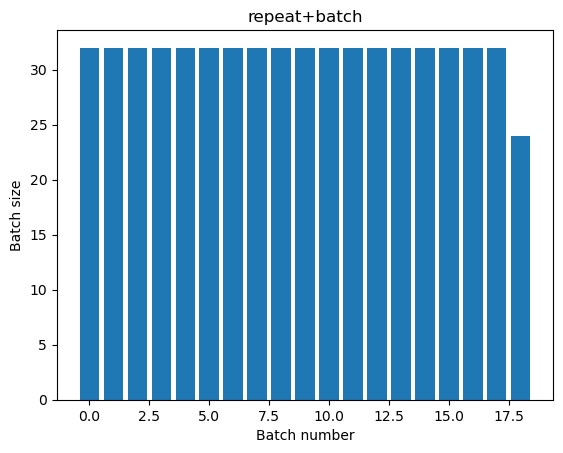

In [40]:
# plot the bar diagram of repeat+batch
repeat_batch_ds = raw_dataset.repeat(3).batch(32)
plot_batch_sizes(repeat_batch_ds,'repeat+batch')

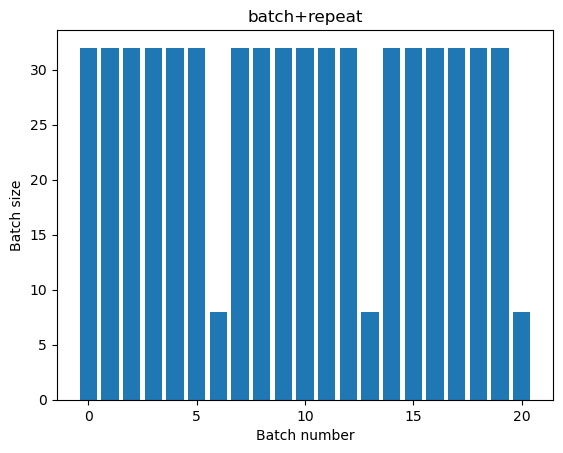

In [41]:
# plot the bar diagram of batch+repeat
batch_repeat_ds = raw_dataset.batch(32).repeat(3)
plot_batch_sizes(batch_repeat_ds,'batch+repeat')

In [42]:
# the url to download CIFAR-10 dataset (binary version)
# see format and details here: http://www.cs.toronto.edu/~kriz/cifar.html
DATA_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
# the image size we want to keep
IMAGE_SIZE_CROPPED = 24
IMAGE_HEIGHT = 32
IMAGE_WIDTH = 32
IMAGE_DEPTH = 3

In [43]:
# donwnload data
if not os.path.exists("cifar-10-batches-py/"): 
    cifar10 = utils.get_file('cifar-10-python.tar.gz',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = DATA_URL,
                                      extract = True)

170498071/170498071 [==============================] - 13s 0us/step


In [44]:
DEST_DIRECTORY = 'cifar-10-batches-py'
filenames_train = [os.path.join(DEST_DIRECTORY,'data_batch_%d' % i) for i in range(1,6)]
filenames_test = [os.path.join(DEST_DIRECTORY,'test_batch')]

In [45]:
# save (img_path, label) pairs
with open('cifar10_train.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filenames'])
    writer.writerows(np.array(filenames_train).reshape(-1,1))
        
with open('cifar10_test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['filenames'])
    writer.writerows(np.array(filenames_test).reshape(-1,1))

In [46]:
# read data
def read_file(file):
    with open(file, 'rb') as fo:
        raw_data = pickle.load(fo, encoding='bytes')
    return raw_data[b'data'],raw_data[b'labels']

# parse training data
@tf.function
def map_fun(image,label):
    image = tf.reshape(image,[IMAGE_DEPTH,IMAGE_HEIGHT,IMAGE_WIDTH])
    image = tf.divide(tf.cast(tf.transpose(image,[1,2,0]),tf.float32),255.0)
    label = tf.one_hot(label,10)
    distorted_image = tf.image.resize_with_crop_or_pad(image, IMAGE_SIZE_CROPPED,IMAGE_SIZE_CROPPED)
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)
    distorted_image = tf.image.per_image_standardization(distorted_image)
    return distorted_image, label

# parse testing data
@tf.function
def map_fun_test(image,label):
    image = tf.reshape(image,[IMAGE_DEPTH,IMAGE_HEIGHT,IMAGE_WIDTH])
    image = tf.divide(tf.cast(tf.transpose(image,[1,2,0]),tf.float32),255.0)
    label = tf.one_hot(label,10)
    distorted_image = tf.image.resize_with_crop_or_pad(image, IMAGE_SIZE_CROPPED,IMAGE_SIZE_CROPPED)
    distorted_image = tf.image.per_image_standardization(distorted_image)
    return distorted_image, label

In [47]:
X_train = None
Y_train = None
X_test = None
Y_test = None

for filename in filenames_train:
    image,label = read_file(filename)
    X_train = image if X_train is None else np.concatenate((X_train,image))
    Y_train = label if Y_train is None else np.concatenate((Y_train,label))

for filename in filenames_test:
    image,label = read_file(filename)
    X_test = image if X_test is None else np.concatenate((X_test,image))
    Y_test = label if Y_test is None else np.concatenate((Y_test,label))

# Construct training Dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train,Y_train)).map(map_fun).shuffle(10000).batch(64)

# # Construct testing Dataset
dataset_test = tf.data.Dataset.from_tensor_slices((X_test,Y_test)).map(map_fun_test).batch(64)

In [48]:
model_cifar = models.Sequential()

model_cifar.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(24, 24, 3)))
model_cifar.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_cifar.add(layers.BatchNormalization())
                
model_cifar.add(layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model_cifar.add(layers.MaxPool2D(pool_size=3,strides=2,padding='same'))
model_cifar.add(layers.BatchNormalization())
                
model_cifar.add(layers.Flatten())
model_cifar.add(layers.Dense(384, activation='relu'))
model_cifar.add(layers.Dropout(0.5))
model_cifar.add(layers.Dense(192, activation='relu'))
model_cifar.add(layers.Dropout(0.5))
model_cifar.add(layers.Dense(10, activation='softmax'))

In [49]:
model_cifar.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_cifar.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        4864      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [50]:
model_cifar.fit(dataset, epochs=5, validation_data=dataset_test, verbose=1)
_, test_acc = model_cifar.evaluate(dataset_test, verbose=0)
print('test accuracy:',test_acc)

Epoch 1/5
782/782 [==============================] - 7s 7ms/step - loss: 1.7446 - accuracy: 0.3828 - val_loss: 1.3334 - val_accuracy: 0.5283
Epoch 2/5
782/782 [==============================] - 6s 7ms/step - loss: 1.3475 - accuracy: 0.5297 - val_loss: 1.1100 - val_accuracy: 0.6106
Epoch 3/5
782/782 [==============================] - 6s 7ms/step - loss: 1.1814 - accuracy: 0.5916 - val_loss: 0.9760 - val_accuracy: 0.6695
Epoch 4/5
782/782 [==============================] - 6s 7ms/step - loss: 1.0745 - accuracy: 0.6323 - val_loss: 0.9421 - val_accuracy: 0.6822
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.9992 - accuracy: 0.6592 - val_loss: 0.8801 - val_accuracy: 0.7006
test accuracy: 0.7006000280380249
